# Applying Machine Learning for Ball Milling Parameters

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

- make feret diameter between 40-100 microns 
- plot mean and test with means
- 

In [234]:
# import data
ball_milling_data = pd.read_excel('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Ball Milling Powder Samples/Ball Milling Powder Sample Prepared for Professor Kordijazi.xlsx')
ball_milling_data = ball_milling_data.loc[(ball_milling_data['Feret'] >= 40) & (ball_milling_data['Feret'] <= 100)]
ball_milling_data.columns

Index(['Tag', 'Ball to Powder Weight Ratio', 'Jar', '20 mm Run Time (Hours)',
       '10 mm Run Time (Hours)', '6 mm Run Time (Hours)',
       'Total Run Time (Hours)', 'Circ.', 'Feret', 'AR', 'Round'],
      dtype='object')

In [235]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = 'Linear Regression Model')

In [236]:
# split data in to x_train and y_train vectors 
X_train = ball_milling_data.drop(columns=['Feret','AR','Round','Total Run Time (Hours)', 'Tag', 'Ball to Powder Weight Ratio', 'Jar','Circ.','6 mm Run Time (Hours)','10 mm Run Time (Hours)'])
y_train= ball_milling_data['Feret']

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)


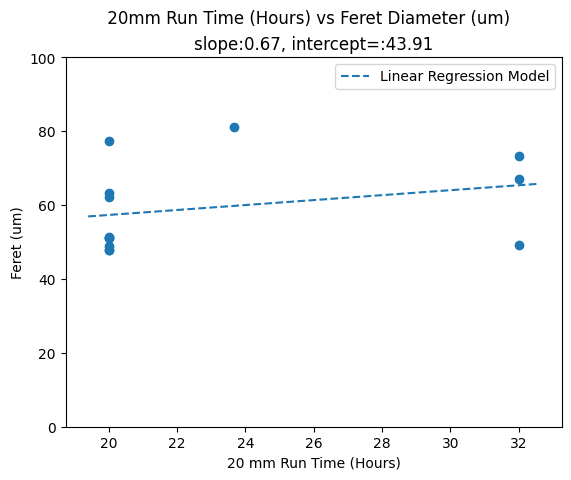

In [237]:
b = lr.intercept_
m = lr.coef_
plt.scatter(ball_milling_data['20 mm Run Time (Hours)'], ball_milling_data['Feret'])
abline(m, b) 
plt.ylabel('Feret (um)')
plt.xlabel('20 mm Run Time (Hours)')
plt.suptitle(' 20mm Run Time (Hours) vs Feret Diameter (um)')
plt.title(f'slope:{m[0]:.2f}, intercept=:{b:.2f}')
plt.ylim(0,100)
plt.legend()

In [238]:
# show predictionrs 
predictions = pd.DataFrame({'20mm Run Time (Hours)': ball_milling_data['20 mm Run Time (Hours)'],
                            'Feret':ball_milling_data['Feret'],
                            'Regression Model Prediction for Feret':y_pred})

predictions

,20mm Run Time (Hours),Feret,Regression Model Prediction for Feret
0,20.000000,77.325245,57.298246
1,20.000000,63.369938,57.298246
2,32.000000,49.252850,65.332934
3,32.000000,67.000817,65.332934
4,32.000000,73.209747,65.332934
5,23.666667,81.141828,59.753289
6,20.000000,51.080422,57.298246
7,20.000000,51.312448,57.298246
8,20.000000,47.888248,57.298246
9,20.000000,48.825772,57.298246


Text(0.5, 1.0, 'Predicted Utilizing 20mm Run Time')

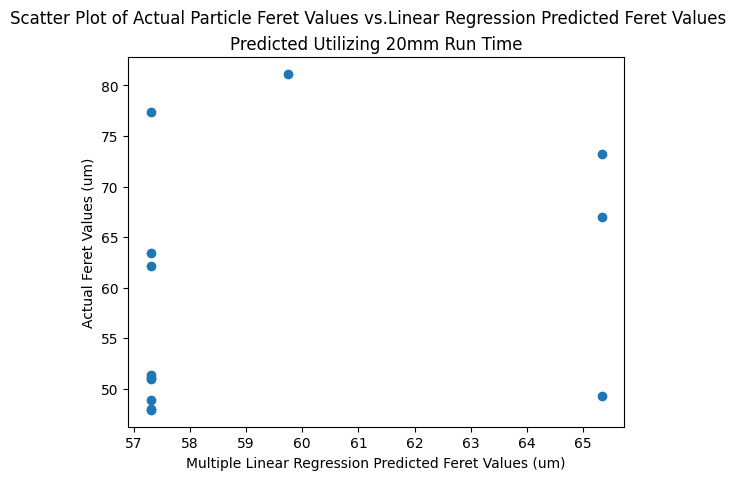

In [239]:
plt.scatter( predictions['Regression Model Prediction for Feret'], predictions['Feret'])
plt.ylabel('Actual Feret Values (um)')
plt.xlabel('Multiple Linear Regression Predicted Feret Values (um)')
plt.suptitle('Scatter Plot of Actual Particle Feret Values vs.Linear Regression Predicted Feret Values')
plt.title('Predicted Utilizing 20mm Run Time')

In [240]:
# split data in to x_train and y_train vectors 
X_train = ball_milling_data.drop(columns=['Feret','AR','Round','Total Run Time (Hours)', 'Tag', 'Ball to Powder Weight Ratio', 'Jar','Circ.','20 mm Run Time (Hours)','6 mm Run Time (Hours)'])
y_train= ball_milling_data['Feret']

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
r2_score(y_train, y_pred)

0.8056535065644027

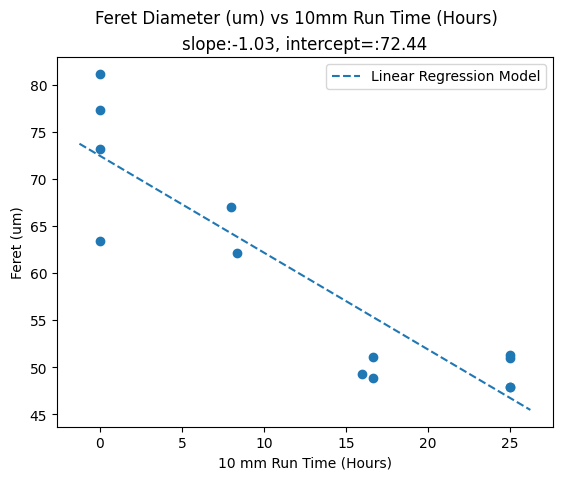

In [241]:
b = lr.intercept_
m = lr.coef_
plt.scatter(ball_milling_data['10 mm Run Time (Hours)'], ball_milling_data['Feret'])
abline(m, b) 
plt.ylabel('Feret (um)')
plt.xlabel('10 mm Run Time (Hours)')
plt.suptitle('Feret Diameter (um) vs 10mm Run Time (Hours)')
plt.title(f'slope:{m[0]:.2f}, intercept=:{b:.2f}')
plt.legend()

In [242]:
# show predictionrs 
predictions = pd.DataFrame({'10mm Run Time (Hours)': ball_milling_data['10 mm Run Time (Hours)'],
                            'Feret':ball_milling_data['Feret'],
                            'Regression Model Prediction for Feret':y_pred})

predictions

,10mm Run Time (Hours),Feret,Regression Model Prediction for Feret
0,0.000000,77.325245,72.443555
1,0.000000,63.369938,72.443555
2,16.000000,49.252850,55.993181
3,8.000000,67.000817,64.218368
4,0.000000,73.209747,72.443555
5,0.000000,81.141828,72.443555
6,16.666667,51.080422,55.307749
7,25.000000,51.312448,46.739845
8,25.000000,47.888248,46.739845
9,16.666667,48.825772,55.307749


Text(0.5, 1.0, 'Predicted Utilizing 10mm Run Time')

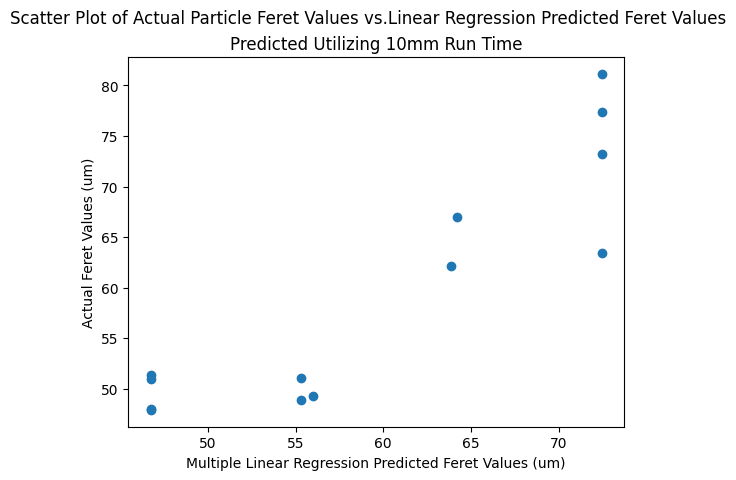

In [243]:
plt.scatter( predictions['Regression Model Prediction for Feret'], predictions['Feret'])
plt.ylabel('Actual Feret Values (um)')
plt.xlabel('Multiple Linear Regression Predicted Feret Values (um)')
plt.suptitle('Scatter Plot of Actual Particle Feret Values vs.Linear Regression Predicted Feret Values')
plt.title('Predicted Utilizing 10mm Run Time')

In [244]:
# split data in to x_train and y_train vectors 
X_train = ball_milling_data.drop(columns=['Feret','AR','Round','Total Run Time (Hours)', 'Tag', 'Ball to Powder Weight Ratio', 'Jar','Circ.','20 mm Run Time (Hours)','10 mm Run Time (Hours)'])
y_train= ball_milling_data['Feret']

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
r2_score(y_train, y_pred)

0.2754101072003625

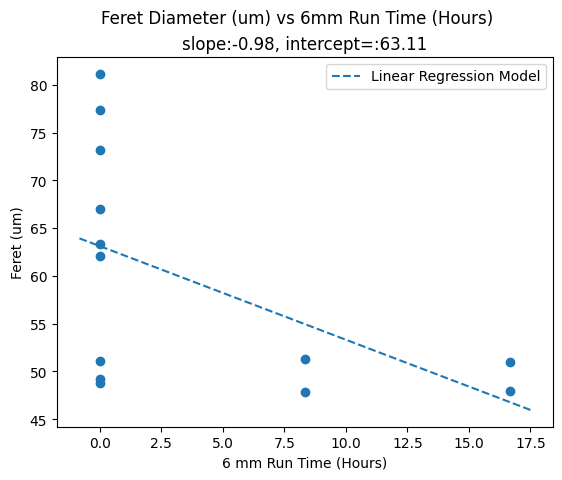

In [245]:
b = lr.intercept_
m = lr.coef_
plt.scatter(ball_milling_data['6 mm Run Time (Hours)'], ball_milling_data['Feret'])
abline(m, b) 
plt.ylabel('Feret (um)')
plt.xlabel('6 mm Run Time (Hours)')
plt.suptitle('Feret Diameter (um) vs 6mm Run Time (Hours)')
plt.title(f'slope:{m[0]:.2f}, intercept=:{b:.2f}')
plt.legend()

In [246]:
# show predictionrs 
predictions = pd.DataFrame({'6mm Run Time (Hours)': ball_milling_data['6 mm Run Time (Hours)'],
                            'Feret':ball_milling_data['Feret'],
                            'Regression Model Prediction for Feret':y_pred})

predictions

,6mm Run Time (Hours),Feret,Regression Model Prediction for Feret
0,0.000000,77.325245,63.109459
1,0.000000,63.369938,63.109459
2,0.000000,49.252850,63.109459
3,0.000000,67.000817,63.109459
4,0.000000,73.209747,63.109459
5,0.000000,81.141828,63.109459
6,0.000000,51.080422,63.109459
7,8.333333,51.312448,54.945014
8,8.333333,47.888248,54.945014
9,0.000000,48.825772,63.109459


Text(0.5, 1.0, 'Predicted Utilizing 6mm Run Time')

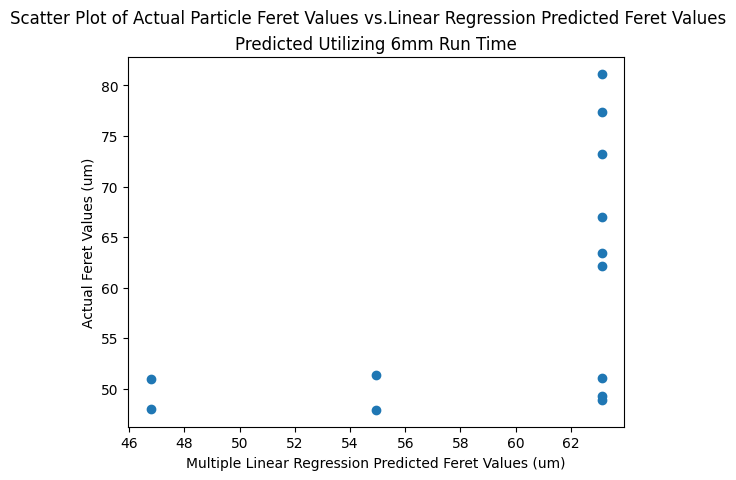

In [247]:
plt.scatter( predictions['Regression Model Prediction for Feret'], predictions['Feret'])
plt.ylabel('Actual Feret Values (um)')
plt.xlabel('Multiple Linear Regression Predicted Feret Values (um)')
plt.suptitle('Scatter Plot of Actual Particle Feret Values vs.Linear Regression Predicted Feret Values')
plt.title('Predicted Utilizing 6mm Run Time')

In [248]:
# split data in to x_train and y_train vectors 
X_train = ball_milling_data.drop(columns=['Feret','AR','Round','Total Run Time (Hours)', 'Tag', 'Ball to Powder Weight Ratio', 'Jar','Circ.'])
y_train= ball_milling_data['Feret']

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
lr.coef_

array([ 0.09606312, -1.31069396,  0.64905787])

In [249]:
# show predictionrs 
predictions = pd.DataFrame({'20mm Run Time (Hours)': ball_milling_data['20 mm Run Time (Hours)'],
                            '10mm Run Time (Hours)': ball_milling_data['10 mm Run Time (Hours)'],
                            '6mm Run Time (Hours)': ball_milling_data['6 mm Run Time (Hours)'],
                            'Feret':ball_milling_data['Feret'],
                            'Regression Model Prediction for Feret':y_pred})

predictions

,20mm Run Time (Hours),10mm Run Time (Hours),6mm Run Time (Hours),Feret,Regression Model Prediction for Feret
0,20.000000,0.000000,0.000000,77.325245,73.254708
1,20.000000,0.000000,0.000000,63.369938,73.254708
2,32.000000,16.000000,0.000000,49.252850,53.436362
3,32.000000,8.000000,0.000000,67.000817,63.921914
4,32.000000,0.000000,0.000000,73.209747,74.407465
5,23.666667,0.000000,0.000000,81.141828,73.606939
6,20.000000,16.666667,0.000000,51.080422,51.409808
7,20.000000,25.000000,8.333333,51.312448,45.896174
8,20.000000,25.000000,8.333333,47.888248,45.896174
9,20.000000,16.666667,0.000000,48.825772,51.409808


Text(0.5, 1.0, 'Predicted Utilizing all 3 Run Time parameters')

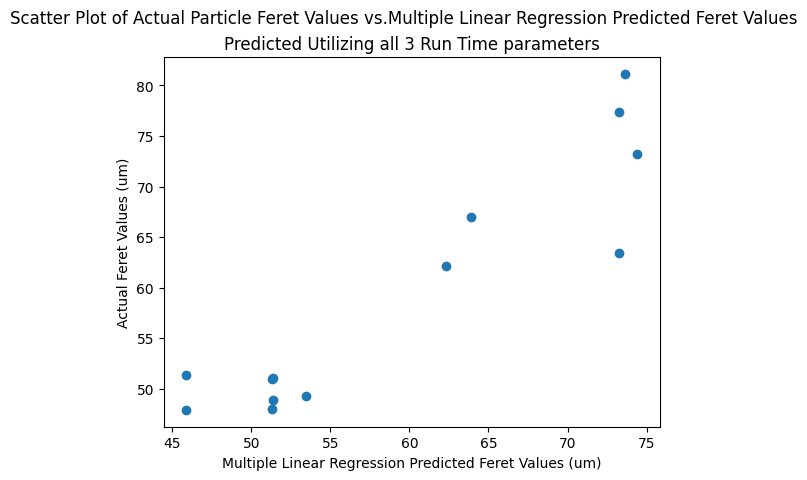

In [250]:
plt.scatter( predictions['Regression Model Prediction for Feret'], predictions['Feret'])
plt.ylabel('Actual Feret Values (um)')
plt.xlabel('Multiple Linear Regression Predicted Feret Values (um)')
plt.suptitle('Scatter Plot of Actual Particle Feret Values vs.Multiple Linear Regression Predicted Feret Values')
plt.title('Predicted Utilizing all 3 Run Time parameters')